## This project builds a machine learning model to predict if a tumor is malignant or benign using the Breast Cancer Wisconsin Dataset 

## Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report 

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import svm
import sklearn as sk

## Load Dataset and print statistics

In [2]:
features = pd.read_csv('BreastCancerDataset.csv')
print(features.head(5))
print(features.describe())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

## In Machine Learning, we like to have our predictions based on binary values (0 and 1). Currently, the diagnosis attribute is labeled as 'M' or 'B' as shown below:

In [3]:
print(features['diagnosis'].head(30))

0     M
1     M
2     M
3     M
4     M
5     M
6     M
7     M
8     M
9     M
10    M
11    M
12    M
13    M
14    M
15    M
16    M
17    M
18    M
19    B
20    B
21    B
22    M
23    M
24    M
25    M
26    M
27    M
28    M
29    M
Name: diagnosis, dtype: object


## In order to fix this, we can use the get_dummies method to convert categorical values to binary values

In [4]:
features = pd.get_dummies(features)

## Now, we have two columns: diagnosis_M, where values of 1 represent that the tumor is malignant and 0 if it is not, and diagnosis_B where values of 1 represent that the tumor is benign and 0 if it is not. 

In [5]:
print(features['diagnosis_M'].head(20))
print(features['diagnosis_B'].head(20))

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    0
Name: diagnosis_M, dtype: uint8
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    1
Name: diagnosis_B, dtype: uint8


## Next, we need to split our data so that we identify the variables that we are trying to predict (labels) and the data that will help us get to the prediction (features).  

## Labels typically represent one column in the data and features represent most, if not all the other columns. In this case, we are trying to predict diagnosis_M, so our labels will be the diagnosis_M column in the data.

## Next, we need to determine the features we will use to predict the diagnosis_M variable. Since the features represent most of the other columns in the data, we just need to remove the uncessessary and redundant columns. This includes the diagnosis_M column itself since it is what we are trying to predict, and the diagnosis_B column since it can be used as another label and we do not want it to be part of our model. The 'id' variable will also be removed because it will not help us in our prediction.

In [6]:
labels = np.array(features['diagnosis_M'])

features = features.drop('diagnosis_M', axis = 1)
features = features.drop('diagnosis_B', axis = 1)
features = features.drop('id', axis = 1)
features = features.drop('Unnamed: 32', axis = 1)

## Check to see all the features will be using in our machine learning model. Again, these are all the variables that will help us predict if the diagnosis is malignant or benign. 

In [7]:
feature_list = list(features.columns)
print(feature_list)

['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


# Split the data into training and testing sets

## We will split the data into two: 
##     -  80% will be used to train the model
##     - 20% will be used to test the model
    
## train_features represents the feature columns of the training data. It will be used to predict train_labels (diagnosis_M)

## The machine learning model will use test_features to build predictions. These predictions will be compared to the test_labels to test accuracy.

In [8]:
features = np.array(features)

train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.20, random_state = 42)

## Next, we should print evaluate the size of our training and testing sets. By using the shape method, we are able to tell the number of rows and columns that represent each. 

## The training set is comprised of 455 rows and the testing set is comprised of 114 rows. These numbers can be changed by changing the test_size variable in the cell above. The greater the test_size, the more rows the testing set will have. 

In [9]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (455, 30)
Training Labels Shape: (455,)
Testing Features Shape: (114, 30)
Testing Labels Shape: (114,)


## Lets print our train features and train labels to see what we are dealing with. This is the data that we will feed into the machine learning model. 

In [10]:
print(train_features)
print()
print(train_labels)

[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]

[0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1
 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 1 1
 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1
 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0

## Next, we need to initialize our machine learning model. I have chosen the Gaussian Naive Bayes Classification model because I have found it to have the highest accuracy compared to to other models. Other classication models will be shown below. 

In [11]:
#Initialize naive bayes model
model = GaussianNB()

# Train the model
model.fit(train_features, train_labels)

# Form predictions on the test data 
predictions = model.predict(test_features)

## After the model was trained with the training data, it was given test_features to predict the diagnosis for each of those cases. The predictions of the model will be compared to test_labels, since they represent the actual diagnosis for each case. 

## Lets print test_labels and the model's predictions just to see what we are dealing with. Remember, since our labels represent the diagnosis_M variable, a 1 represents that the tumor is malignant and 0 if it is not, therefore meaning it is benign. 

In [12]:
print(test_labels)
print(predictions)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]
[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 1
 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


## Now, lets check the accuracy of the model. The accuracy represents the correct predictions / the total amount of predictions. However, we can get more specific.

## We will be using a confusion matrix to further gauge the model's performance. 

## 

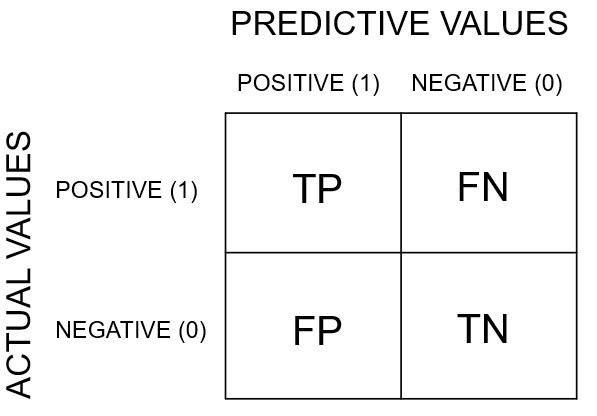


In [13]:
print('\nAccuracy:', str(accuracy_score(test_labels, predictions) * 100) + '%')
print(confusion_matrix(test_labels, predictions))
print(classification_report(test_labels, predictions))


Accuracy: 97.36842105263158%
[[71  0]
 [ 3 40]]
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## We have achieved 97% accuracy with our model! 

## More info on model performance can be found here: 
https://www.geeksforgeeks.org/confusion-matrix-machine-learning/

## In order to better determine the accuracy of the model, we will use 10 fold cross-validation. It ensures that every observation from the original dataset has the chance of appearing in training and test set. This is one among the best approach if we have a limited input data.

In [16]:
scores = cross_val_score(model, features, labels, scoring='accuracy', cv=10)
print('\nMean Accuracy:', str(np.mean(scores) * 100) + '%')


Mean Accuracy: 93.86796733212338%


## More info on cross validation can be found here: 
https://machinelearningmastery.com/k-fold-cross-validation/

## In machine learning, it is important to test other algorithms to see which model results in the highest accuracy. 

## Here are the results of several other classification algorithms:

In [15]:
lr = LogisticRegression()
lr.fit(train_features, train_labels)
predictions = lr.predict(test_features)

print('\nLogistic Regression Accuracy:', str(accuracy_score(test_labels, predictions) * 100) + '%')
print(confusion_matrix(test_labels, predictions))


SVM = svm.LinearSVC()
SVM.fit(train_features, train_labels)
predictions = SVM.predict(test_features)

print('\nSupport Vector Machine Accuracy:', str(accuracy_score(test_labels, predictions) * 100) + '%')
print(confusion_matrix(test_labels, predictions))


neuralnNet = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(12,12,12),max_iter=2000)
neuralnNet.fit(train_features, train_labels)
predictions = neuralnNet.predict(test_features)

print('\nNeural Network Accuracy:', str(accuracy_score(test_labels, predictions) * 100) + '%')
print(confusion_matrix(test_labels, predictions))


rf = RandomForestClassifier()
rf.fit(train_features, train_labels)
predictions = rf.predict(test_features)

print('\nRandom Forest Accuracy:', str(accuracy_score(test_labels, predictions) * 100) + '%')
print(confusion_matrix(test_labels, predictions))


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_features, train_labels)
predictions = knn.predict(test_features)

print('\nKNeighbors Accuracy:', str(accuracy_score(test_labels, predictions) * 100) + '%')
print(confusion_matrix(test_labels, predictions))


lda = LinearDiscriminantAnalysis()
lda.fit(train_features, train_labels)
predictions = lda.predict(test_features)

print('\nLinear Discriminant Analysis Accuracy:', str(accuracy_score(test_labels, predictions) * 100) + '%')
print(confusion_matrix(test_labels, predictions))


Logistic Regression Accuracy: 95.6140350877193%
[[70  1]
 [ 4 39]]

Support Vector Machine Accuracy: 77.19298245614034%
[[45 26]
 [ 0 43]]


C:\Users\faiza\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\faiza\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)



Neural Network Accuracy: 94.73684210526315%
[[71  0]
 [ 6 37]]

Random Forest Accuracy: 97.36842105263158%
[[71  0]
 [ 3 40]]

KNeighbors Accuracy: 92.98245614035088%
[[68  3]
 [ 5 38]]

Linear Discriminant Analysis Accuracy: 95.6140350877193%
[[70  1]
 [ 4 39]]


C:\Users\faiza\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
